<a href="https://colab.research.google.com/github/scooobertdooobert/CS595A/blob/main/carbo_assign4_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Summary 
The purpose of this assignment was to analyze the Diabetes ata set from sklearn by plotting lerning curves for both the Support Vector Machine using linearSVR and Support Vector Machine using SVR. The Diabetes dataset was imported then preprocessed for use in each resepective model. 


In [22]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

# Loading Diabetes dataset and printing head, shape, and average values

In [5]:
diabetes  = load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df["target"] = diabetes.target
print("First five rows of the data set: ")
df.head()

First five rows of the data set: 


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
print("Dataframe Shape: ")
df.shape

Dataframe Shape: 


(442, 11)

In [7]:
print("Target Shape: ")
df["target"].shape

Target Shape: 


(442,)

In [8]:
print("Min, Max, and Average Values of dataset: ")
df.describe()

Min, Max, and Average Values of dataset: 


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


# Displaying the Scatter Matrix 

Scatter Matrix: 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f833ad8fc50>,
      dtype=object)

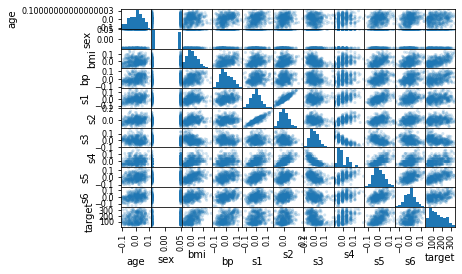

In [9]:
print("Scatter Matrix: ")
pd.plotting.scatter_matrix(df, alpha = 0.2)

# Creating and Preprocessing the training/testing data

In [10]:
np.random.seed(42)
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)


Removing any Null/NA Values

In [11]:
incom_rows = df.isnull().any(axis=1).head()
incom_rows.dropna()
diabetes_tr = train_set.drop("target", axis=1)
diabetes_labels = train_set["target"].copy()
diabetes_labels.head()

17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: target, dtype: float64

In [12]:
diabetes_test = test_set.drop("target", axis=1)
diabetes_labels_test = test_set["target"].copy()
diabetes_labels_test.head()

287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: target, dtype: float64

In [13]:
scaler = StandardScaler()
diabetes_train_scaler = scaler.fit_transform(diabetes_tr)
diabetes_test_scalar = scaler.fit_transform(diabetes_test)

Code from Textbook

In [14]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

# Creating the Standard Vector Machine using SVR

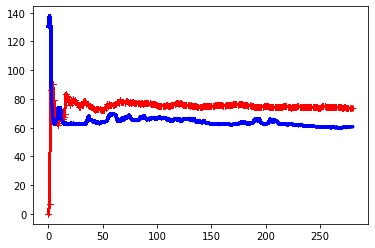

In [20]:
svr_model = SVR(C=1, gamma='auto')
plot_learning_curves(svr_model, diabetes_train_scaler, diabetes_labels)

# Creating the Standard Vector Machine using LinearSVR

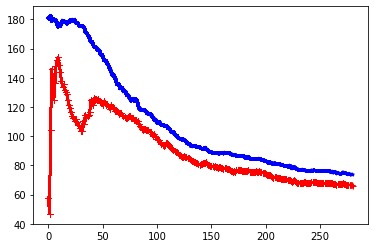

In [26]:
linear_model = LinearSVR()
plot_learning_curves(linear_model, diabetes_train_scaler, diabetes_labels)